In [10]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd


def read_dock_history(path):
    data = []
    with open(path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        data.append(int(line.strip().split(' ')[-1]))
    return np.array(data)


def read_bot_history(path):
    data = []
    with open(path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        data.append(int(line.strip().split(' ')[-1]))
    return np.array(data)


def read_ship_history(path):
    data = []
    with open(path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        js = json.loads(line[10:].strip())
        data.append([js['status'], js['pos'], js['num']])
    return pd.DataFrame(data, columns=['status', 'pos', 'num'])

In [11]:
d0 = read_dock_history('../dock0.log')
d1 = read_dock_history('../dock1.log')
d2 = read_dock_history('../dock2.log')
d3 = read_dock_history('../dock3.log')
d4 = read_dock_history('../dock4.log')
d5 = read_dock_history('../dock5.log')
d6 = read_dock_history('../dock6.log')
d7 = read_dock_history('../dock7.log')
d8 = read_dock_history('../dock8.log')
d9 = read_dock_history('../dock9.log')

b0 = read_bot_history('../bot0.log')
b1 = read_bot_history('../bot1.log')
b2 = read_bot_history('../bot2.log')
b3 = read_bot_history('../bot3.log')
b4 = read_bot_history('../bot4.log')
b5 = read_bot_history('../bot5.log')
b6 = read_bot_history('../bot6.log')
b7 = read_bot_history('../bot7.log')
b8 = read_bot_history('../bot8.log')
b9 = read_bot_history('../bot9.log')

s0 = read_ship_history('../ship0.log')
s1 = read_ship_history('../ship1.log')
s2 = read_ship_history('../ship2.log')
s3 = read_ship_history('../ship3.log')
s4 = read_ship_history('../ship4.log')

docks = [d0, d1, d2, d3, d4, d5, d6, d7, d8, d9]
bots = [b0, b1, b2, b3, b4, b5, b6, b7, b8, b9]
ships = [s0, s1, s2, s3, s4]

d_sum = d0 + d1 + d2 + d3 + d4 + d5 + d6 + d7 + d8 + d9
b_sum = b0 + b1 + b2 + b3 + b4 + b5 + b6 + b7 + b8 + b9

# DOCK

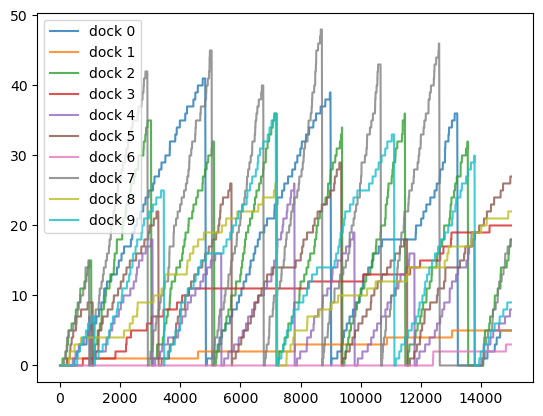

In [12]:
for i in range(10):
    plt.plot(docks[i], alpha=.8, label=f'dock {i}')
plt.legend()

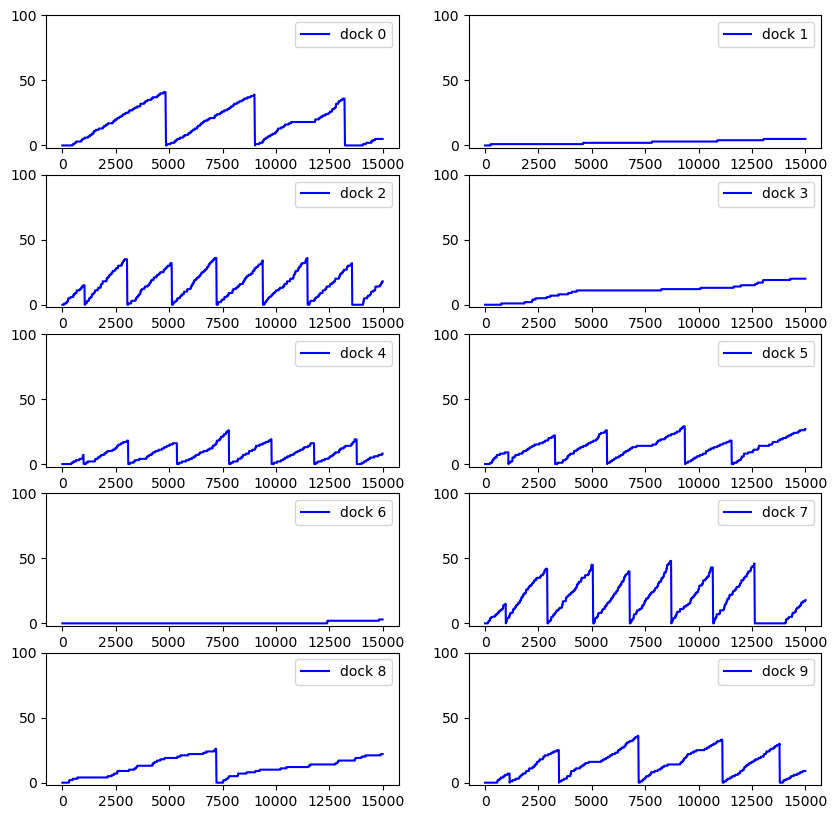

In [13]:
fig, axs = plt.subplots(5, 2, figsize=(10, 10))
for i in range(5):
    for j in range(2):
        axs[i, j].plot(docks[i * 2 + j], 'b', label=f'dock {i * 2 + j}')
        axs[i, j].set_ylim(-2, 100)
        axs[i, j].legend()

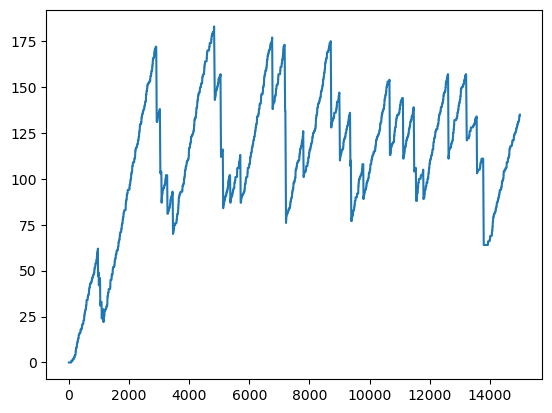

In [14]:
plt.plot(d_sum)

# BOT

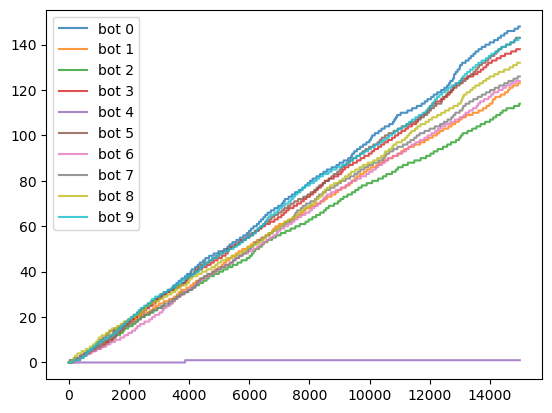

In [15]:
for i in range(10):
    plt.plot(bots[i], alpha=0.8, label=f'bot {i}')
plt.legend()

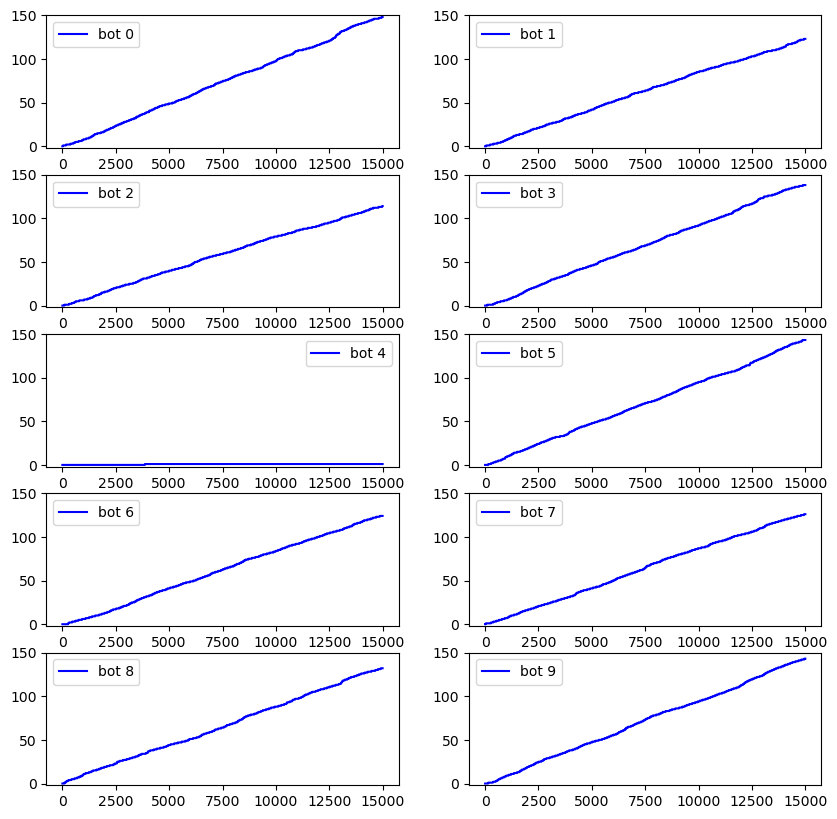

In [16]:
fig, axs = plt.subplots(5, 2, figsize=(10, 10))
for i in range(5):
    for j in range(2):
        axs[i, j].plot(bots[i * 2 + j], 'b', label=f'bot {i * 2 + j}')
        axs[i, j].set_ylim(-2, 150)
        axs[i, j].legend()

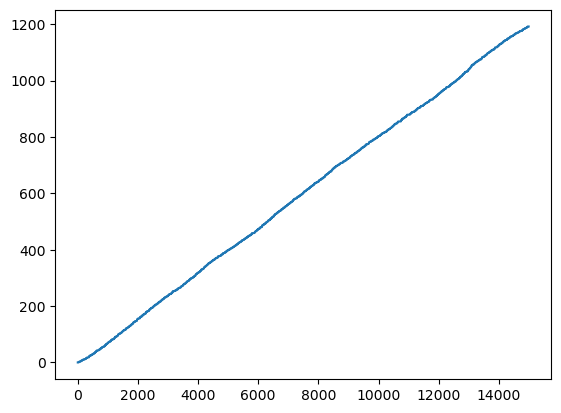

In [17]:
plt.plot(b_sum)

# SHIP

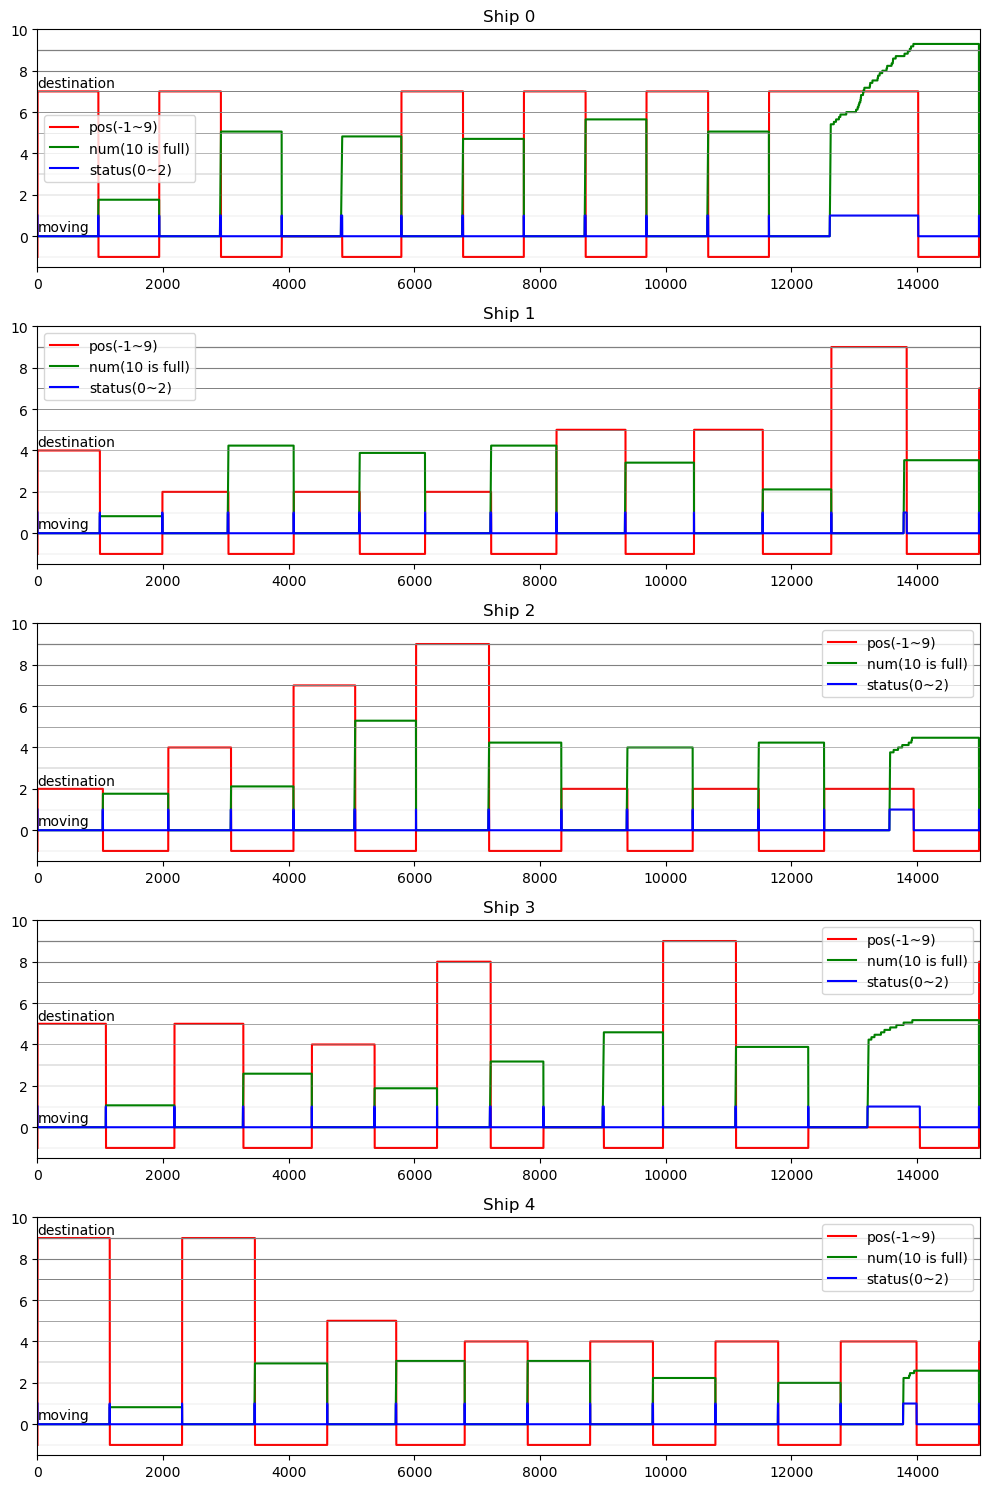

In [18]:
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
for i in range(5):
    axs[i].plot(ships[i]['pos'], 'r', label=f'pos(-1~9)')
    axs[i].plot(ships[i]['num']*10/85, 'g', label=f'num(10 is full)')
    axs[i].plot(ships[i]['status'], 'b', label=f'status(0~2)')
    for j in range(-2, 10):
        axs[i].hlines(j, 0, len(ships[i]), 'grey',  linewidth=abs(j/10))
    axs[i].text(0,0.25, 'moving')
    axs[i].text(0,ships[i].iloc[1]['pos']+0.2, 'destination')
    axs[i].set_xlim(0, 15000)
    axs[i].set_title(f'Ship {i}')
    axs[i].legend()
    axs[i].set_ylim(-1.5, 10)
plt.tight_layout()